In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
station = "Hot"

In [3]:
data = xr.load_dataset(f"./products/{station}_obs.zarr", engine="zarr")
data

<xarray.Dataset> Size: 13kB
Dimensions:    (time: 546, latitude: 1, longitude: 1, layer: 1)
Coordinates:
  * latitude   (latitude) float64 8B 22.75
  * layer      (layer) int64 8B 0
  * longitude  (longitude) int64 8B -158
  * time       (time) datetime64[ns] 4kB 1994-02-17 1994-02-18 ... 2022-09-02
Data variables:
    day        (time, latitude, longitude, layer) float64 4kB 0.4208 ... 3.491
    night      (time, latitude, longitude, layer) float64 4kB 1.48 ... 2.564
Attributes:
    creation date:  2024-10-13T20:03:40.309826
    layer:          epipelagic
    station:        Hot

# Remove outliers


In [4]:
q1 = data.quantile(0.25, dim="time")
q3 = data.quantile(0.75, dim="time")
iqr = q3 - q1

In [5]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [6]:
new_data = data.where((data > lower_bound) & (data < upper_bound))

# Remove observations when day > night


In [7]:
to_remove = new_data["day"].where(new_data["day"] > new_data["night"]).dropna("time").time
new_data = new_data.drop_sel(time=to_remove)
to_remove.to_series()

time
1994-02-19   1994-02-19
1994-09-23   1994-09-23
1997-05-06   1997-05-06
1998-05-13   1998-05-13
2001-08-07   2001-08-07
2002-10-06   2002-10-06
2003-12-19   2003-12-19
2003-12-20   2003-12-20
2004-09-29   2004-09-29
2004-11-27   2004-11-27
2006-05-27   2006-05-27
2006-05-28   2006-05-28
2006-07-14   2006-07-14
2007-12-21   2007-12-21
2008-05-29   2008-05-29
2008-10-11   2008-10-11
2009-01-20   2009-01-20
2009-02-17   2009-02-17
2009-07-25   2009-07-25
2009-07-26   2009-07-26
2009-08-18   2009-08-18
2009-08-19   2009-08-19
2009-11-04   2009-11-04
2010-10-02   2010-10-02
2011-11-04   2011-11-04
2012-04-30   2012-04-30
2013-05-17   2013-05-17
2014-01-15   2014-01-15
2018-07-25   2018-07-25
2021-07-16   2021-07-16
2021-07-17   2021-07-17
2022-09-02   2022-09-02
Name: time, dtype: datetime64[ns]

## DAY


Text(0.5, 1.0, 'Day observations')

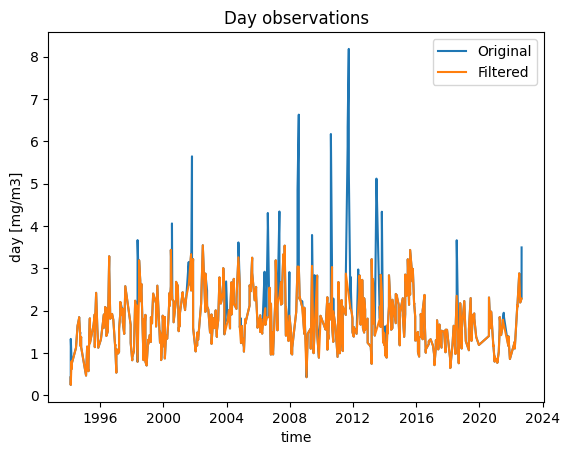

In [8]:
data.day.dropna("time").plot(label="Original")
new_data.day.dropna("time").plot(label="Filtered")
plt.legend()
plt.title("Day observations")

## NIGHT


Text(0.5, 1.0, 'Night observations')

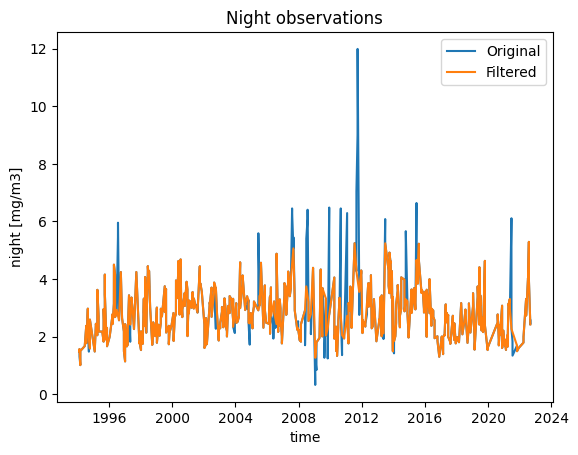

In [9]:
data.night.dropna("time").plot(label="Original")
new_data.night.dropna("time").plot(label="Filtered")
plt.legend()
plt.title("Night observations")

# Export


In [11]:
new_data.to_zarr(f"./products/{station}_obs_filtered.zarr")